In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

In [16]:
def findarg(data, value):
    arg = 0
    for wl in data:
        if wl<value:
            arg = arg + 1
        else:
            return arg
        
    return arg

In [17]:
gr1 = pd.read_csv('gr1.csv')
sin = pd.read_csv('sin_m3-9_Xis0_Full_2mW_30s 2023 June 19 16_17_33.csv')
sio= pd.read_csv('sio_m3-9_Xis0_Full_2mW_30s 2023 June 20 11_29_23.csv')
bkg= pd.read_csv('sin_m3-10_offSquare_Full_2mW_30s 2023 June 19 16_42_38.csv')

shift = 1.8

norm_peak_min = 610
norm_peak_max = 620



In [18]:
def bkg_norm(data):
    minValue = min(data['I'])
    return (data['I']-minValue)/(gr1['I'][findarg(gr1['W'], norm_peak_min)+np.argmax(gr1['I'][findarg(gr1['W'], norm_peak_min):findarg(gr1['W'], norm_peak_max)])] - minValue)

(0.0, 9.0)

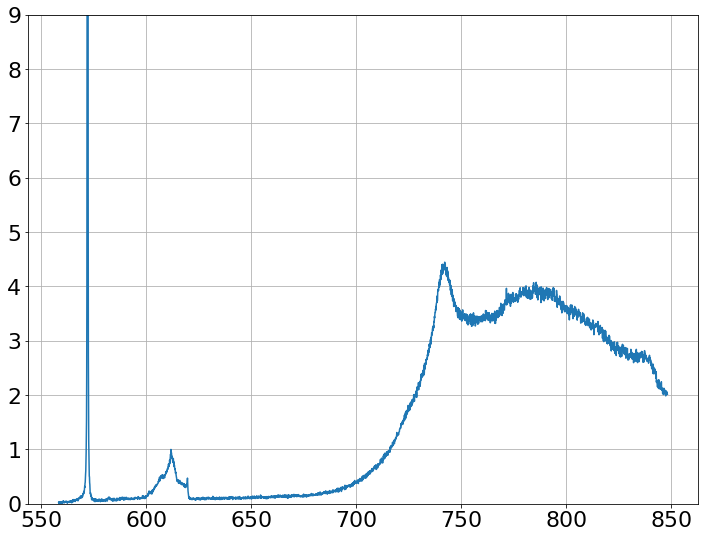

In [19]:
plt.figure(figsize=(12,9))
plt.grid()
y1 = bkg_norm(gr1)

y1[findarg(gr1['W'],624.4)]= y1[findarg(gr1['W'],624.2)]
x1 = gr1['W']- shift
plt.plot(x1,y1)
plt.ylim([0,9])

(0.0, 9.0)

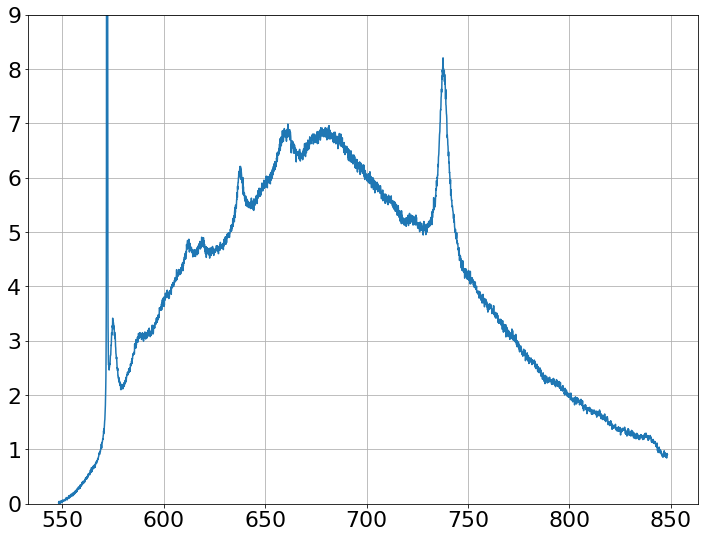

In [20]:
plt.figure(figsize=(12,9))
plt.grid()
y2 = bkg_norm(sin)
x2 = sin['W']- shift
plt.plot(x2,y2)
plt.ylim([0,9])

(0.0, 9.0)

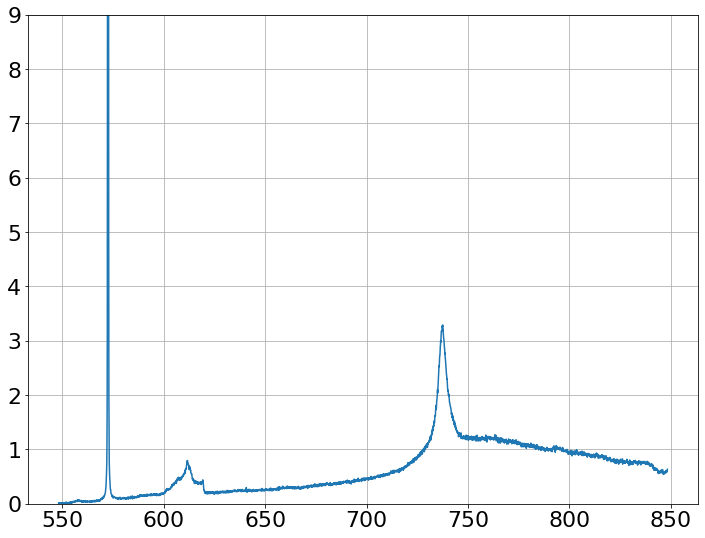

In [21]:
plt.figure(figsize=(12,9))
plt.grid()
y3 = bkg_norm(sio)
x3 = sio['W']- shift
plt.plot(x3,y3)
plt.ylim([0,9])

([<matplotlib.axis.XTick at 0x275a169cfa0>,
 [Text(550, 0, ''),
  Text(600, 0, ''),
  Text(650, 0, ''),
  Text(700, 0, ''),
  Text(750, 0, ''),
  Text(800, 0, ''),
  Text(850, 0, '')])

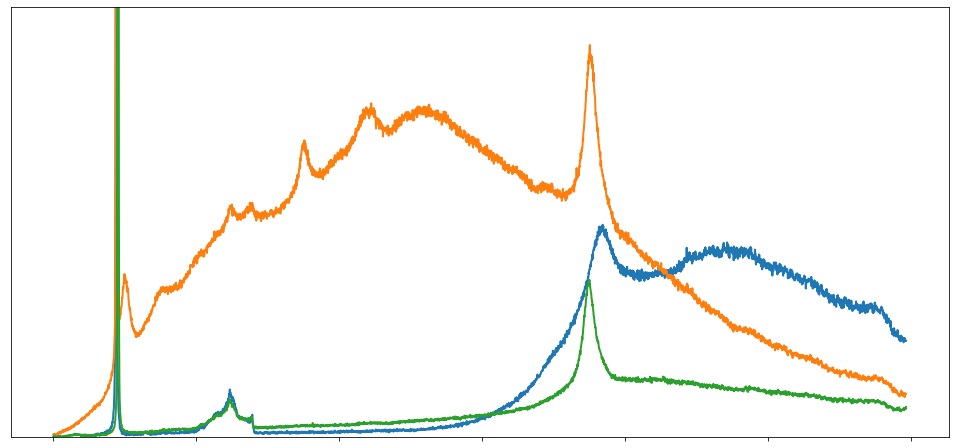

In [22]:
plt.rcParams.update({'font.size': 22})
cm = 1/2.54 
fig = plt.figure(figsize=(42.69*cm, 20.11*cm))
plt.plot(x1[20:],y1[20:],linewidth=2)
plt.plot(x2[20:],y2[20:], linewidth=2)
plt.plot(x3[20:],y3[20:], linewidth=2)
plt.ylim([0,9])
plt.yticks([])
plt.xticks([550,600,650,700,750,800,850],['','','','','','',''])
